1/1 [==============================] - 0s 109ms/step
1
{'loss': [0.26210394501686096, 0.10366125404834747, 0.12106892466545105, 0.0921514555811882, 0.06742096692323685, 0.03951112553477287, 0.027766097337007523, 0.016087597236037254, 0.01472024992108345, 0.011833787895739079], 'accuracy': [0.8971962332725525, 0.9626168012619019, 0.9559070467948914, 0.9654924273490906, 0.9741193652153015, 0.9846633076667786, 0.9899352788925171, 0.9944883584976196, 0.9952073097229004, 0.9964054822921753], 'val_loss': [0.010353022255003452, 0.0032114535570144653, 0.0337798148393631, 0.028557971119880676, 0.007964211516082287, 0.03476950153708458, 0.011114870198071003, 0.00041013144073076546, 0.025374354794621468, 4.343391992733814e-05], 'val_accuracy': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]}


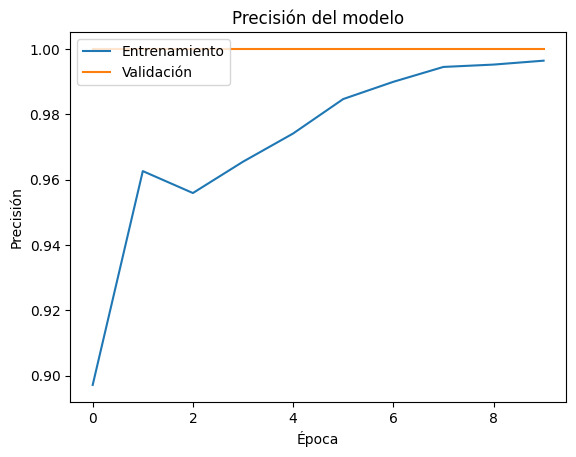

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.python.keras import layers
from tensorflow.python.keras.models import load_model
from tensorflow.python.keras.layers import Dense
import matplotlib.pyplot as plt
import joblib
# Cargamos el modelo
model = keras.models.load_model('modelo_entrenado/modelo_deteccion.h5')
# carga una imagen nueva para probar el modelo
ruta_test1 = 'chest_xray/test/PNEUMONIA/person1623_virus_2813.jpeg'
ruta_test2 = 'chest_xray/test/NORMAL/NORMAL2-IM-0323-0001.jpeg'
img = keras.preprocessing.image.load_img(
    ruta_test1, target_size=(224, 224)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

# realiza la predicción con el modelo
predictions = model.predict(img_array)
score = predictions[0]

# muestra el resultado de la predicción
if score > 0.5:
    print("1")
else:
    print("0")
# Llamamos el history
history_cargado = joblib.load('historia/history.joblib')
print(history_cargado)
# grafica la precisión del modelo
plt.plot(history_cargado['accuracy'])
plt.plot(history_cargado['val_accuracy'])
plt.title('Precisión del modelo')
plt.ylabel('Precisión')
plt.xlabel('Época')
plt.legend(['Entrenamiento', 'Validación'], loc='upper left')
plt.show()